Import libraries

In [2]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns


Read Data

In [14]:
def read_data(filepath: str) -> pd.DataFrame:
    try:
        df = pd.read_csv(filepath)
        assert(train.empty != True)
        return df
    except FileNotFoundError as e:
        print(f"File not found at {filepath}\n{e}")
        return None;

global separate 
separate = '\n********************************\n'

Explore data

In [218]:
def explore_data(df: pd.DataFrame) -> None:
    #print .info()
    print( df.info() )
    
    #print the percentage of missing values from each column
    print(separate,  round( df.isnull().sum().sort_values(ascending=False) / len(df) * 100, 1) )
    
    #See average survivability per Pclass 
    print(separate, round( df[ ['Pclass', 'Survived'] ]\
                           .groupby('Pclass')\
                           .mean() * 100, 1) )
    
    #see average survivability per Pclass + Sex
    print(separate, round( df[ ['Pclass', 'Sex', 'Survived'] ]\
                           .groupby( ['Pclass', 'Sex'] )\
                           .mean() * 100, 0) )
    #1st Class Females -> 97 percent survived
    #2nd Class Females -> 92 percent survived
    #3rd Class Females -> 50 percent survived
    ##
    #1st Class Males -> 37 percent survived
    #2nd Class Males -> 16 percent survived
    #3rd Class Males -> 14 percent survived
    ##
    print(separate)
    sns.histplot(df['Age'], stat='count', bins=10)
    #mostly aged 20-30s
    
    plt.figure()
    sns.kdeplot( df[df.Sex=='female']['Age'], color='red')
    sns.kdeplot( df[df.Sex=='male']['Age'], color='blue', fill=True)
    #More young (10 yr old) females than males
    
    plt.figure()
    sns.violinplot(data=df, hue='Survived', y='Age', palette={0: 'r', 1: 'g'})
    #fatter around the younger ages, meaning they had a slightly higher chance of surviving
    
    print(separate, round(df[ ['Pclass', 'Age'] ]
                    .groupby(['Pclass'])
                    .mean(), 1) )
    
    plt.figure()
    sns.violinplot(data=df, hue='Survived', y='Embarked', palette={0: 'r', 1: 'g'})
    
    print(separate, "Passengers Embarked from S :: ", len( df[ (df.Embarked == 'S')] ) )
    print("Passengers Embarked from C :: ", len( df[ (df.Embarked == 'C')] ) )
    print("Passengers Embarked from Q :: ", len( df[ (df.Embarked == 'Q')] ) )
    
    print(separate, round( df[ ['Pclass', 'Survived', 'Embarked', 'Sex'] ]\
                    .groupby( ['Pclass', 'Embarked', 'Sex'] )
                    .mean() * 100, 1) )   
    #seems as if males who embarked from Q had terrible chances of survival compared to others
    #lets look into this
    print(separate, df[ (df.Embarked == 'Q' ) & (df.Sex == 'male') ][ ['Pclass', 'Fare'] ].describe() )
    #average Pclass == 3, so that explains the anomaly. 
    #min Pclass is 1 however, and 100 percent of the males who embarked from Q in Pclass expired, lets have a look at those passengers.
    #Crew maybe?
    print(separate, len(df[ (df.Embarked == 'Q' ) & (df.Sex == 'male' ) & (df.Pclass == 1)]))
    #only 1 1st class passenger got on at Q...and he died so that explains that
    #what about Pclass 2
    print(separate, len(df[ (df.Embarked == 'Q' ) & (df.Sex == 'male' ) & (df.Pclass == 2)]))
    #only one as well, and he died too
    print(separate, len(df[ (df.Embarked == 'Q' ) & (df.Sex == 'male' ) & (df.Pclass == 3)]))
    #only 3 / 39 males from Pclass = 3 and Embarked == Q lived



In [258]:
def explore_fare(df: pd.DataFrame) -> None:
    #lets print the .describe() for some insight
    print(separate, df['Fare'].describe())
    #average = 32
    #min = 0
    #so lets investigate the 0 cases
        
    print(separate, len(df[ df.Fare == 0 ]))
    #only 15 cases, lets look at the data
#print(separate, df[ df.Fare == 0 ])
    #all males
    #all got on at Port S
    #traveling alone, no siblings or parents (Sibsp / Parch both 0)
    print(separate, df[ df.Fare == 0 ][ ['Pclass', 'Age', 'Survived'] ]
                    .mean())         
    #Pclass = 1.9
    #Age = 35
    #Survived = .06
    #So on average 2nd Class middle-aged men, and expired 
    #probably the crew, moving on
    
    #lets look at some cheap fares
    print(separate, len(df[ df.Fare < 8.0 ]))
    #241 samples, far too many, lets go down to 7
    print(separate, len(df[ (df.Fare < 7.1) & (df.Fare != 0) ]))
    #28 samples, we can work that that, lets see some info
    
    #i should exclude the 0 fares since they are crew
    #lets see sex distribution
    print(separate, 'Percent Male = ', round( len( df[ (df.Fare < 7.1) & (df.Fare != 0) & (df.Sex == 'male') ])  / len( df[ (df.Fare < 7.1) & (df.Fare != 0) ]) * 100,1 ))
    print('Percent Female = ', round( len( df[ (df.Fare < 7.1) & (df.Fare != 0) & (df.Sex == 'female') ])  / len( df[ (df.Fare < 7.1) & (df.Fare != 0) ]) * 100,1 ))
    #95 percent male
    
    #okay so...cheap fare + mostly male, lets see if they are 3rd class
    print(separate, round(df[ (df.Fare < 7.1) & (df.Fare != 0) ][['Pclass', 'Survived'] ]
                    .groupby( ['Pclass'])
                    .mean()*100, 1))     
    
    #I do see Pclass = 1, lets see
    print(separate, 'Pclass 1 Sub-$7 Fare Total = ', len( df[ (df.Fare < 7.1) & (df.Fare != 0) & (df.Pclass == 1)] ))
    #only 1 instance okay swag, back to this information
    #3 missing ages here, lets see 
    
    print(separate, round( df[ (df.Fare < 7.1) & (df.Fare != 0)]['Age']
                    .mean(), 0) )         
    #middle aged men, 31 years old

    #lets expand this search, 
    print(separate, len( df[ (df.Fare < 9.0) & (df.Fare != 0)]))
    #296 people 
    
    print(round( df[ (df.Fare < 9.0) & (df.Fare != 0)][ ['Pclass', 'Age', 'SibSp', 'Parch', 'Survived'] ]
           .mean(), 1))
    #entirely 3rd class
    #middle aged
    #almost all died
    #lets see the number of children
    
    print('\nNumber of children ( < 14 ) = ', len( df[ (df.Fare < 9.0) & (df.Fare != 0) & (df.Age < 14)] ))
    #2
    print('Number of elders ( > 50 ) = ', len( df[ (df.Fare < 9.0) & (df.Fare != 0) & (df.Age > 50)] ))
    #9
    #so out of 296 sub-9 dollar fares, 285 are middle aged 
    #how many are missing ages
    print(separate, df[ (df.Fare < 9.0) & (df.Fare != 0) ]['Age'].isnull().sum())
    #91 missing ages...
    print(round(df[ (df.Fare < 9.0) & (df.Fare != 0)][ ['Pclass', 'Age', 'Sex']]
                .groupby( ['Pclass', 'Sex'])
                .mean(), 1))
    #can fill missing gaps based on this information

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB
None

********************************
 Cabin          77.1
Age            19.9
Embarked        0.2
PassengerId     0.0
Name            0.0
Pclass          0.0
Survived        0.0
Sex             0.0
Parch           0.0
SibSp           0.0
Fare

0

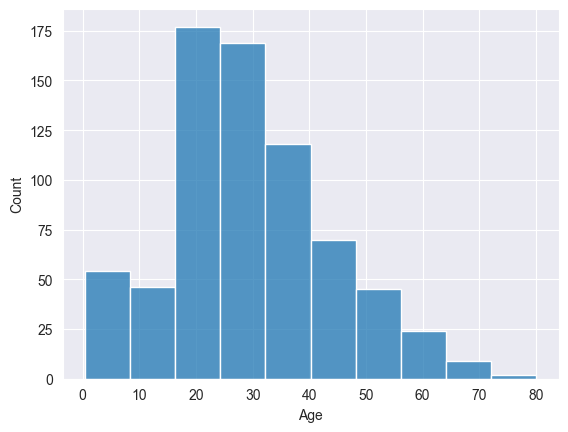

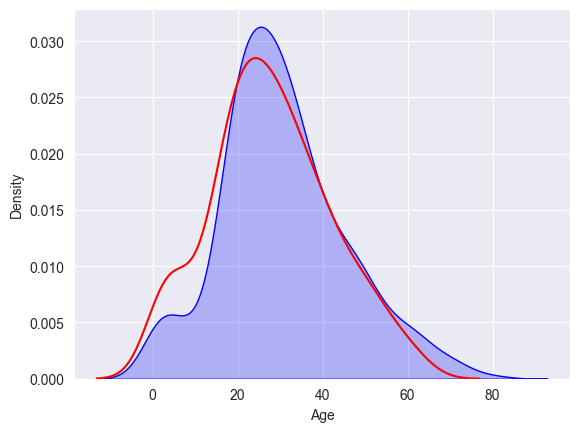

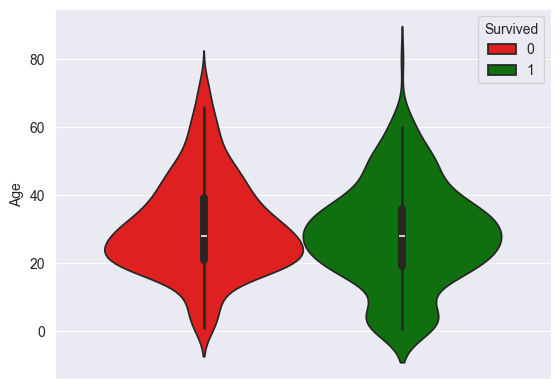

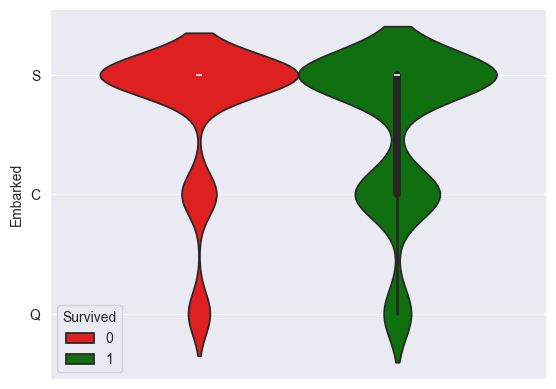

In [261]:
def main(argc: int, argv: str) -> int:
    #define filepath and read the training data
    filepath = r'.venv/data/train.csv'
    train_data = read_data(filepath)
    assert(train_data is not None) #ensure read_data func did not fail
    
    #explore the train data
    explore_data(train_data)
    explore_fare(train_data)
    #drop cabin
    #Higher PClass -> higher chance 
    #Male + Sub-1st class -> low chance
    
    #fill embarked -> mode
    #filling AGE: 
    ###Higher Pclass = higher age
    ###
    ###
    return 0
main(0, '')